In [52]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [53]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [54]:
data_dir

'.\\datasets\\flower_photos'

In [55]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [56]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [57]:
roses = list(data_dir.glob('roses/*'))
len(roses),type(roses[0])

(641, pathlib.WindowsPath)

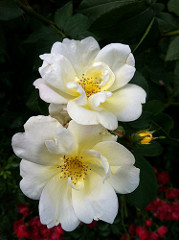

In [58]:
PIL.Image.open(str(roses[0]))

In [59]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [60]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [61]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [62]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

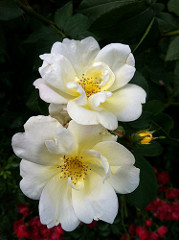

In [63]:
PIL.Image.open(str(flowers_images_dict['roses'][0]))

In [70]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) #cv2 don't except window path so convert into string
img.shape,type(img)

((240, 179, 3), numpy.ndarray)

In [72]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

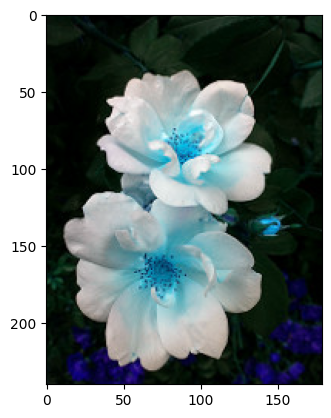

In [73]:
plt.imshow(img)

In [74]:
# make dimensions of all the images same
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [79]:
y[:5],type(x)

([0, 0, 0, 0, 0], list)

In [108]:
x = np.array(x)
y = np.array(y)


In [109]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [110]:
len(x_train),len(x)
x_train = x_train/255
x_test = x_test/255

In [89]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)#softmax activation can be applied
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=10)            

Epoch 1/10
86/86 [==============================] - 58s 637ms/step - loss: 1.2748 - accuracy: 0.4688
Epoch 2/10
86/86 [==============================] - 47s 551ms/step - loss: 0.9395 - accuracy: 0.6370
Epoch 3/10
86/86 [==============================] - 37s 429ms/step - loss: 0.7819 - accuracy: 0.6988
Epoch 4/10
86/86 [==============================] - 37s 432ms/step - loss: 0.5718 - accuracy: 0.7849
Epoch 5/10
86/86 [==============================] - 37s 430ms/step - loss: 0.3925 - accuracy: 0.8539
Epoch 6/10
86/86 [==============================] - 37s 429ms/step - loss: 0.2206 - accuracy: 0.9281
Epoch 7/10
86/86 [==============================] - 37s 433ms/step - loss: 0.1267 - accuracy: 0.9629
Epoch 8/10
86/86 [==============================] - 38s 439ms/step - loss: 0.0641 - accuracy: 0.9862
Epoch 9/10
86/86 [==============================] - 39s 459ms/step - loss: 0.0505 - accuracy: 0.9884
Epoch 10/10
86/86 [==============================] - 41s 481ms/step - loss: 0.0464 - accura

In [90]:
model.evaluate(x_test,y_test) #very less accuracy for this using data augmentation

29/29 [==============================] - 4s 98ms/step - loss: 1.8207 - accuracy: 0.6089


[1.8206698894500732, 0.6089324355125427]

In [91]:
pred = model.predict(x_test)

29/29 [==============================] - 3s 90ms/step


In [92]:
pred.shape

(918, 5)

In [95]:

np.argmax(pred[0])

2

In [118]:
# improving test accuracy using data augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

In [123]:
#plt.imshow(x[0])


ResourceExhaustedError: Exception encountered when calling layer 'sequential_6' (type Sequential).

{{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[3670,180,180,3] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Cast]

Call arguments received by layer 'sequential_6' (type Sequential):
  • inputs=tf.Tensor(shape=(3670, 180, 180, 3), dtype=float64)
  • training=None
  • mask=None

In [120]:
plt.imshow(data_augmentation(x)[1].numpy().astype("uint8"))

ResourceExhaustedError: Exception encountered when calling layer 'random_flip' (type RandomFlip).

{{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[3670,180,180,3] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Mul]

Call arguments received by layer 'random_flip' (type RandomFlip):
  • inputs=tf.Tensor(shape=(3670, 180, 180, 3), dtype=float32)
  • training=True

In [121]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=10)    

MemoryError: Unable to allocate 1020. MiB for an array with shape (2752, 180, 180, 3) and data type float32